In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
PATH = '/home/harsh/Downloads/SLMNIST'

In [5]:
data = ImageList.from_folder(PATH).split_by_folder().label_from_folder().transform(get_transforms(do_flip=False,max_rotate= 5.0)).databunch(bs = 64)


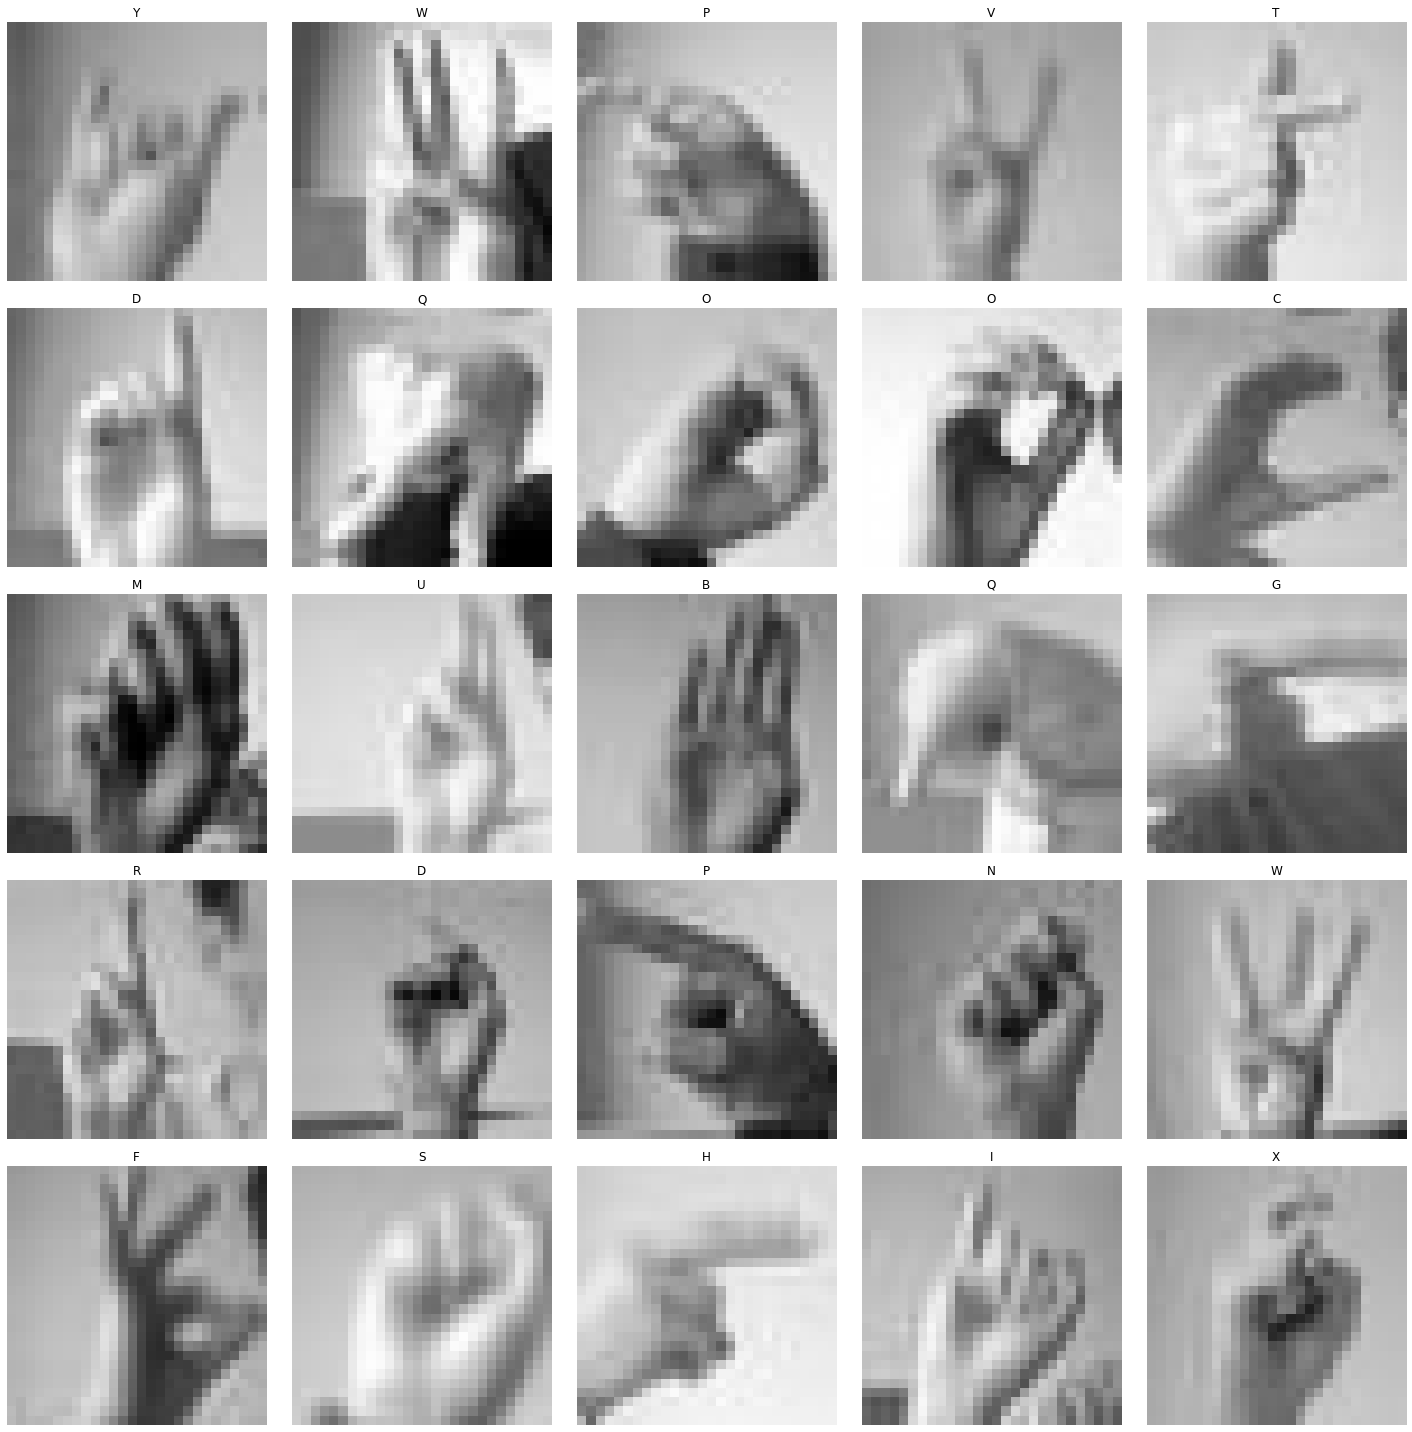

In [6]:
data.show_batch(5)

In [30]:
learn = cnn_learner(data,models.resnet50, metrics = [error_rate,accuracy,top_k_accuracy])

In [31]:
print(data.sanity_check())

None


In [32]:
learn.fit_one_cycle(8, max_lr = slice(1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,2.255847,1.642826,0.484384,0.515616,0.862660,01:07
1,1.452580,1.226391,0.391383,0.608617,0.938093,01:09
2,1.008639,0.842480,0.289180,0.710820,0.972253,01:11
3,0.727601,0.625185,0.208868,0.791132,0.986893,01:13
4,0.583788,0.468552,0.165226,0.834774,0.992192,01:11
5,0.461196,0.387529,0.132599,0.867401,0.996235,01:12
6,0.428576,0.369697,0.128416,0.871584,0.996235,01:11
7,0.432141,0.361593,0.125906,0.874094,0.996235,01:13


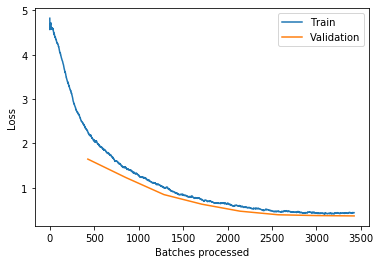

In [33]:
learn.recorder.plot_losses()

In [34]:
learn.export('resnet50-frozen.pkl')

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('M', 'N', 81),
 ('U', 'D', 43),
 ('U', 'R', 35),
 ('R', 'U', 34),
 ('E', 'M', 28),
 ('S', 'N', 28),
 ('G', 'H', 26),
 ('W', 'V', 26),
 ('D', 'R', 25),
 ('H', 'G', 25),
 ('T', 'X', 24),
 ('V', 'U', 23),
 ('G', 'T', 21),
 ('C', 'O', 17),
 ('N', 'X', 17),
 ('Y', 'F', 17),
 ('K', 'U', 15),
 ('R', 'K', 15),
 ('M', 'S', 14),
 ('L', 'D', 13),
 ('S', 'A', 13),
 ('I', 'Y', 12),
 ('K', 'R', 12),
 ('N', 'M', 12),
 ('S', 'M', 12),
 ('D', 'E', 11),
 ('E', 'X', 11),
 ('K', 'D', 11),
 ('N', 'S', 11),
 ('Y', 'W', 11),
 ('K', 'S', 10),
 ('D', 'U', 8),
 ('E', 'N', 8),
 ('H', 'T', 8),
 ('U', 'K', 8),
 ('A', 'Y', 7),
 ('E', 'S', 7),
 ('K', 'P', 7),
 ('T', 'L', 7),
 ('B', 'W', 6),
 ('L', 'C', 6),
 ('M', 'E', 6),
 ('T', 'Y', 6),
 ('B', 'K', 5),
 ('E', 'I', 5),
 ('K', 'M', 5),
 ('N', 'E', 5),
 ('V', 'R', 5),
 ('C', 'N', 4),
 ('D', 'K', 4),
 ('D', 'L', 4),
 ('H', 'L', 4),
 ('H', 'P', 4),
 ('M', 'Y', 4),
 ('O', 'E', 4),
 ('X', 'D', 4),
 ('A', 'V', 3),
 ('B', 'U', 3),
 ('C', 'F', 3),
 ('M', 'X', 3),
 ('R', 'S

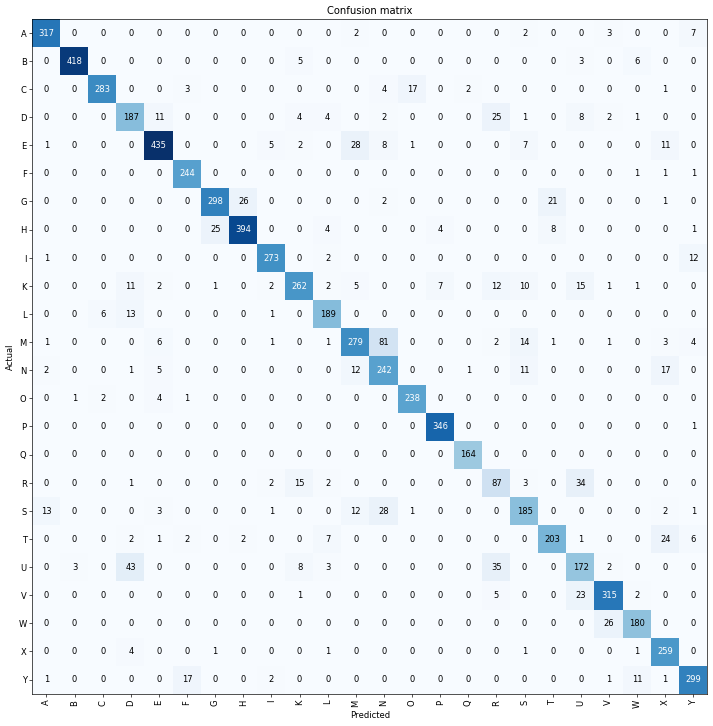

In [36]:
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [37]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(5,max_lr = slice(1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,0.183312,0.125509,0.044757,0.955243,0.999582,01:26
1,0.055814,0.035617,0.014361,0.985639,1.000000,01:21
2,0.015476,0.016087,0.007250,0.992750,1.000000,00:25


In [40]:
learn.export('resnet50-unfrozen.pkl')

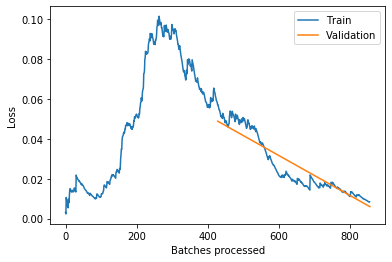

In [41]:
learn.recorder.plot_losses()

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('E', 'M', 13), ('Y', 'W', 8), ('N', 'M', 1), ('V', 'U', 1)]

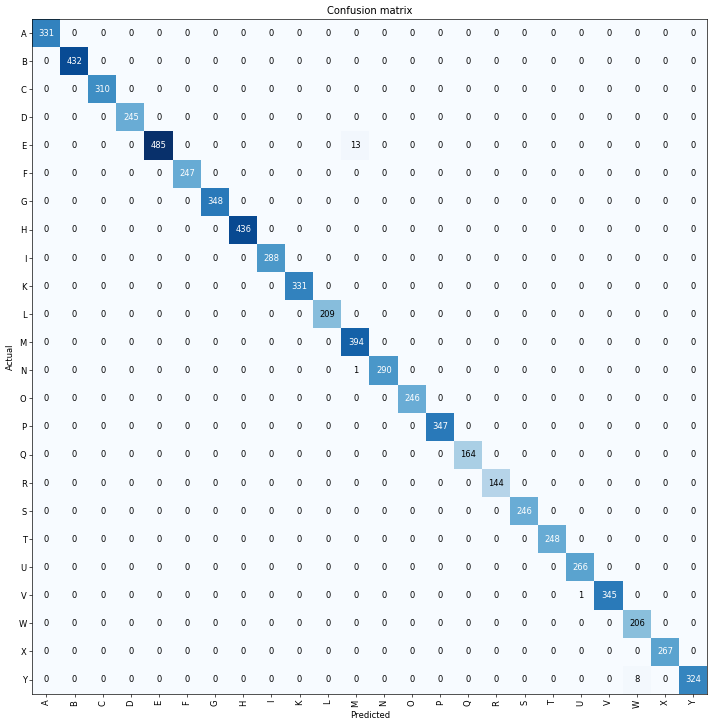

In [44]:
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [45]:
learn = cnn_learner(data,models.resnet34, metrics = [error_rate,accuracy,top_k_accuracy])

In [46]:
learn.fit_one_cycle(8,max_lr = slice(1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,2.664161,2.021118,0.593837,0.406163,0.798104,00:18
1,1.689535,1.254311,0.392638,0.607362,0.936419,00:19
2,1.182012,0.926562,0.302008,0.697992,0.970162,00:19
3,0.912202,0.701850,0.231874,0.768126,0.982432,00:18
4,0.771869,0.617242,0.205940,0.794060,0.985778,00:19
5,0.672384,0.537174,0.177356,0.822644,0.991216,00:18
6,0.642080,0.497689,0.165784,0.834216,0.992889,00:17
7,0.607885,0.501198,0.162019,0.837981,0.991216,00:18


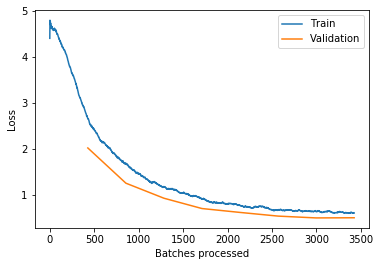

In [47]:
learn.recorder.plot_losses()

In [48]:
learn.export('resnet34-frozen.pkl')

In [49]:
interp = ClassificationInterpretationicationInterpretation.from_learner(learn)
interp.most_confused()

[('M', 'N', 74),
 ('V', 'W', 60),
 ('U', 'R', 52),
 ('G', 'H', 40),
 ('W', 'V', 37),
 ('Y', 'V', 37),
 ('M', 'E', 30),
 ('T', 'L', 26),
 ('B', 'W', 25),
 ('N', 'M', 25),
 ('S', 'A', 25),
 ('N', 'E', 24),
 ('S', 'M', 24),
 ('E', 'M', 23),
 ('H', 'G', 22),
 ('M', 'S', 22),
 ('E', 'S', 21),
 ('K', 'D', 19),
 ('R', 'S', 19),
 ('D', 'R', 18),
 ('E', 'N', 18),
 ('N', 'S', 18),
 ('B', 'U', 17),
 ('S', 'N', 14),
 ('K', 'S', 13),
 ('X', 'D', 13),
 ('C', 'O', 12),
 ('C', 'N', 11),
 ('D', 'U', 11),
 ('K', 'U', 11),
 ('U', 'D', 11),
 ('G', 'T', 10),
 ('R', 'U', 10),
 ('V', 'U', 10),
 ('Y', 'L', 10),
 ('H', 'P', 9),
 ('I', 'M', 9),
 ('M', 'X', 9),
 ('N', 'A', 9),
 ('O', 'I', 9),
 ('R', 'N', 9),
 ('T', 'X', 9),
 ('D', 'B', 8),
 ('D', 'E', 8),
 ('B', 'D', 7),
 ('E', 'I', 7),
 ('I', 'D', 7),
 ('S', 'D', 7),
 ('T', 'D', 7),
 ('Y', 'W', 7),
 ('E', 'D', 6),
 ('L', 'X', 6),
 ('O', 'C', 6),
 ('S', 'E', 6),
 ('T', 'I', 6),
 ('Y', 'A', 6),
 ('B', 'N', 5),
 ('C', 'P', 5),
 ('K', 'R', 5),
 ('L', 'V', 5),
 ('M'

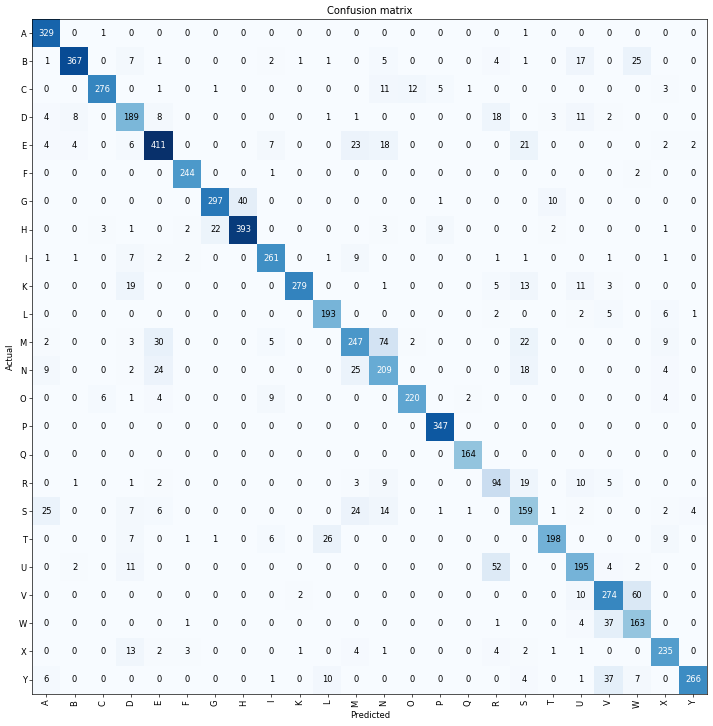

In [50]:
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [51]:
learn.unfreeze()

In [52]:
learn.fit_one_cycle(5,max_lr = slice(1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,0.244189,0.201735,0.063999,0.936001,0.999442,00:22
1,0.110701,0.051113,0.016592,0.983408,1.000000,00:19
2,0.037582,0.023882,0.007111,0.992889,1.000000,00:21
3,0.010117,0.015181,0.004880,0.995120,1.000000,00:20
4,0.005171,0.004245,0.000976,0.999024,1.000000,00:21


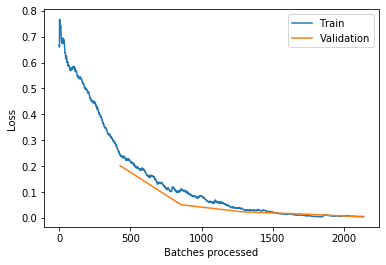

In [53]:
learn.recorder.plot_losses()

In [54]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('E', 'M', 6), ('B', 'K', 1)]

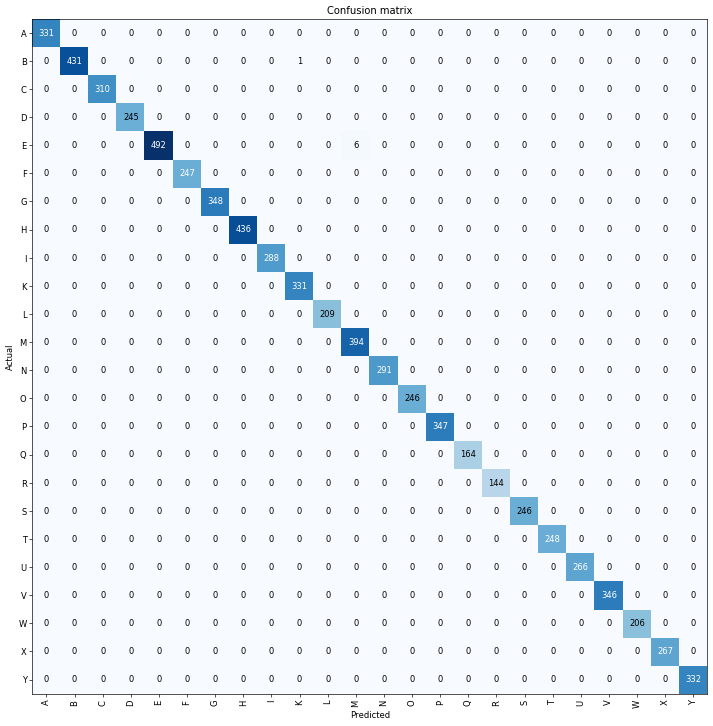

In [55]:
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [56]:
learn.export('resnet34-unfrozen.pkl')